In [6]:
# Movie Recommendation System using Cosine Similarity

In [7]:
## Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [20]:
## Step 2: Load and Merge Datasets
ratings_df = pd.read_csv("Dataset.csv")
movies_df = pd.read_csv("Movie_Id_Titles.csv")

In [22]:
# Merge the datasets on 'item_id'
merged_df = pd.merge(ratings_df, movies_df, on="item_id")
merged_df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [23]:
## Step 3: Create User-Movie Rating Matrix
rating_matrix = merged_df.pivot_table(index='user_id', columns='title', values='rating')
rating_matrix.fillna(0, inplace=True)
rating_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
## Step 4: Compute Cosine Similarity Between Movies
movie_similarity = cosine_similarity(rating_matrix.T)
similarity_df = pd.DataFrame(movie_similarity, index=rating_matrix.columns, columns=rating_matrix.columns)
similarity_df.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),1.000000,0.000000,0.024561,0.099561,0.185236,0.159265,0.000000,0.052203,0.000000,0.033326,...,0.000000,0.000000,0.000000,0.027774,0.118840,0.142315,0.029070,0.000000,0.110208,0.000000
1-900 (1994),0.000000,1.000000,0.014139,0.009294,0.007354,0.004702,0.010055,0.067038,0.000000,0.000000,...,0.152499,0.015484,0.000000,0.069284,0.018243,0.023408,0.006694,0.079640,0.042295,0.000000
101 Dalmatians (1996),0.024561,0.014139,1.000000,0.167006,0.061105,0.143878,0.203781,0.225803,0.027642,0.092337,...,0.000000,0.021965,0.030905,0.274877,0.204267,0.101199,0.056976,0.172155,0.045714,0.000000
12 Angry Men (1957),0.099561,0.009294,0.167006,1.000000,0.056822,0.167235,0.304078,0.422506,0.072682,0.394854,...,0.060946,0.016502,0.000000,0.403270,0.259436,0.145519,0.105226,0.038901,0.060101,0.081261
187 (1997),0.185236,0.007354,0.061105,0.056822,1.000000,0.132327,0.042928,0.065060,0.043133,0.027300,...,0.000000,0.141997,0.000000,0.068257,0.067786,0.091293,0.099490,0.025184,0.142667,0.096449


In [25]:
## Step 5: Recommend Similar Movies
def recommend_movies(movie_name, num_recommendations=5):
    if movie_name not in similarity_df.columns:
        return f"Movie '{movie_name}' not found in database."
    sim_scores = similarity_df[movie_name].sort_values(ascending=False)[1:num_recommendations+1]
    return sim_scores

In [42]:
# Example: Top 5 movies similar to 'Star Wars (1977)'
recommend_movies('Babe (1995)', 5)

title
Back to the Future (1985)            0.593032
Raiders of the Lost Ark (1981)       0.572875
E.T. the Extra-Terrestrial (1982)    0.572769
Princess Bride, The (1987)           0.567447
Empire Strikes Back, The (1980)      0.567230
Name: Babe (1995), dtype: float64

In [43]:
## Step 6: Visualize Top 5 Similar Movies
target_movie = "Babe (1995)"
num_recommendations = 5
similar_scores = similarity_df[target_movie].sort_values(ascending=False)[1:num_recommendations+1]

<ipython-input-44-be0b5a2985c8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=similar_scores.values, y=similar_scores.index, palette="viridis")


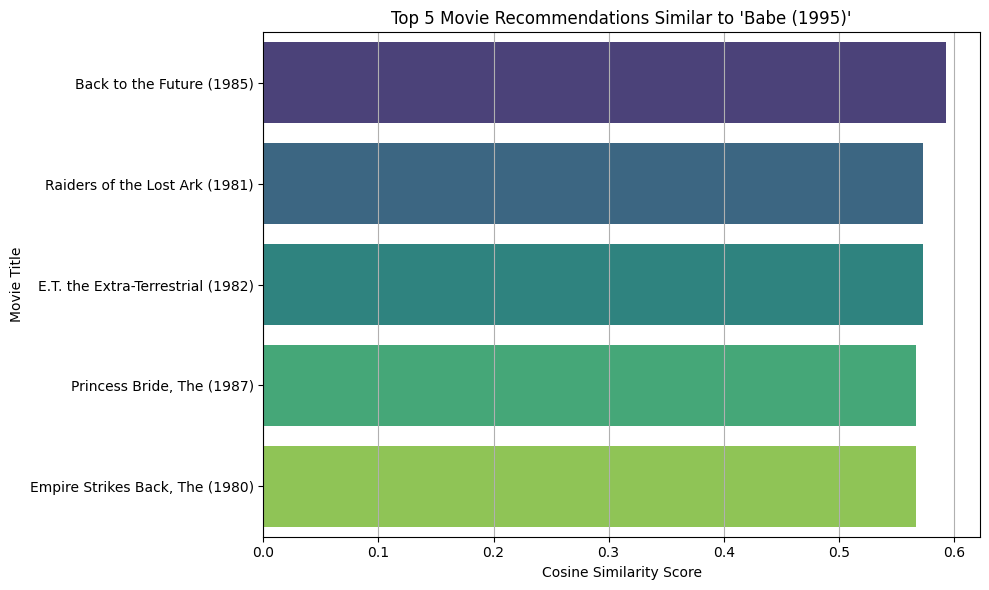

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x=similar_scores.values, y=similar_scores.index, palette="viridis")
plt.title(f"Top {num_recommendations} Movie Recommendations Similar to '{target_movie}'")
plt.xlabel("Cosine Similarity Score")
plt.ylabel("Movie Title")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [45]:
## Step 7: Heatmap of Top 10 Most Rated Movies
top_movies = merged_df['title'].value_counts().head(10).index.tolist()
top_sim_matrix = similarity_df.loc[top_movies, top_movies]

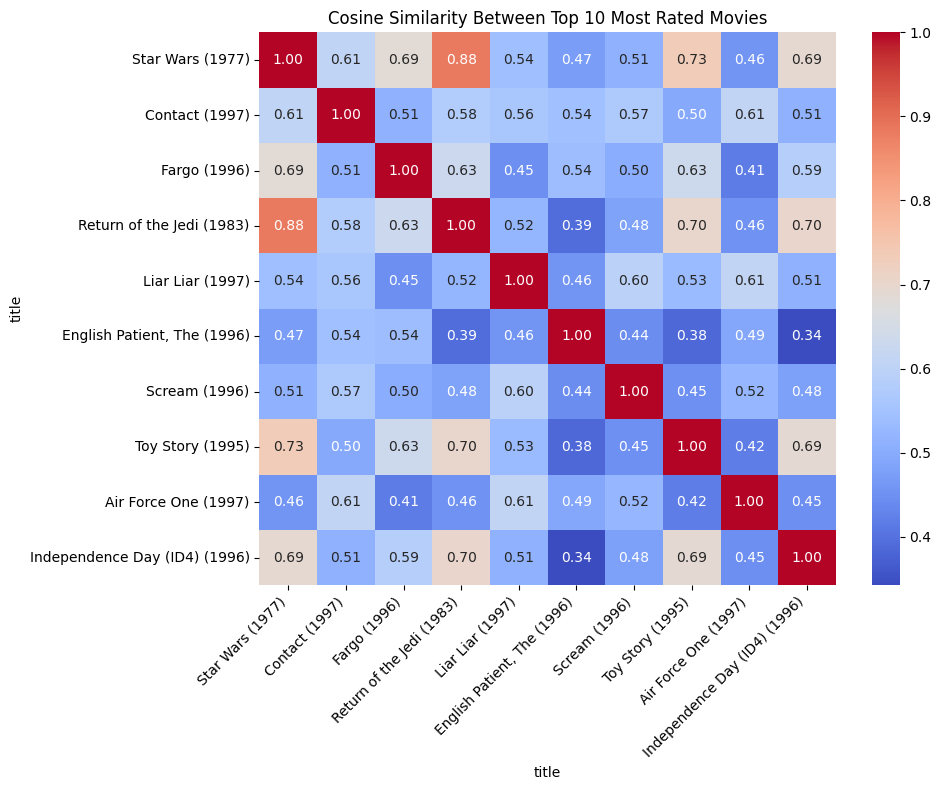

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(top_sim_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cosine Similarity Between Top 10 Most Rated Movies")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [47]:
# Function to recommend movies based on user input
def get_movie_recommendations():
    movie_input = input("Enter a movie title: ").strip()
    
    if movie_input not in similarity_df.columns:
        print(f"❌ Movie '{movie_input}' not found in the database.")
        return

    # Get top 5 recommendations
    recommended_movies = similarity_df[movie_input].sort_values(ascending=False)[1:6]
    
    print(f"\n🎬 Top 5 movies similar to '{movie_input}':\n")
    for i, (movie, score) in enumerate(recommended_movies.items(), 1):
        print(f"{i}. {movie} — Similarity Score: {score:.2f}")

# Run the recommender
get_movie_recommendations()


Enter a movie title:  Babe (1995)



🎬 Top 5 movies similar to 'Babe (1995)':

1. Back to the Future (1985) — Similarity Score: 0.59
2. Raiders of the Lost Ark (1981) — Similarity Score: 0.57
3. E.T. the Extra-Terrestrial (1982) — Similarity Score: 0.57
4. Princess Bride, The (1987) — Similarity Score: 0.57
5. Empire Strikes Back, The (1980) — Similarity Score: 0.57
